In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator

def SendState(qc1, qc2, qc1_name):
    ''' This function takes the output of a circuit qc1 (made up only of x and
        h gates and initializes another circuit qc2 with the same state
    ''' 
    
    # Quantum state is retrieved from qasm code of qc1
    qs = qc1.qasm().split(sep=';')[4:-1]

    # Process the code to get the instructions
    for index, instruction in enumerate(qs):
        qs[index] = instruction.lstrip()

    # Parse the instructions and apply to new circuit
    for index, instruction in enumerate(qs):
        if instruction[0] == 'x':
            old_qr = int(instruction[5:-1])
            qc2.x(qr[old_qr])
        elif instruction[0] == 'h':
            old_qr = int(instruction[5:-1])
            qc2.h(qr[old_qr])
        elif instruction[0] == 'b':
            if (qs[index+1][0] != 'm'):
                qc2.barrier(range(n))
        elif instruction[0] == 'm': # Exclude measuring:
            pass
        else:
            raise Exception('Unable to parse instruction')

## Exercise 1: Design the key-encoding quantum circuit.
For this, first create a 8-bit classical register and a 8-qubit quantum register and then merge them.

Hereinafter we will refer to this circuit as ‘Alice quantum circuit’.

In [2]:
# Complete the code to create an n-bit classical register and an n-qubit quantum register
# Use 'QuantumRegister' and 'ClassicalRegister'

n = 8  # Note for a local backend n can go as up as 23, after that it raises a Memory Error

qr = QuantumRegister(n)
cr = ClassicalRegister(n)

# Quantum circuit for Alice state
aliceqc = QuantumCircuit(qr, cr)

## Exercise 2: Generate a random 8-bit quantum key. 

For this, first generate a random number using ‘np.random.randint’ and then convert it into binary using ‘np.binary_repr’.

Print the key both in decimal and binary forms.

Run the code several times to make sure the key is randomly generated at every run. 

Finally, encode the key as qubits using the ‘Alice quantum circuit’. 

For this, apply an X gate to the corresponding qubit when the digit in the key is equal to ‘1’. 

Plot the resulting circuit.

In [3]:
# Generate a random number in the range of n qubits

randNum = np.random.randint(0, 2**8-1)

alice_key = randNum

# Print the key in decimal form

print(alice_key)

105


In [4]:
# Convert key to binary for encoding

randNumBinary = np.binary_repr(randNum, n)

alice_key = randNumBinary

# Print the key in binary form

print(alice_key)

01101001


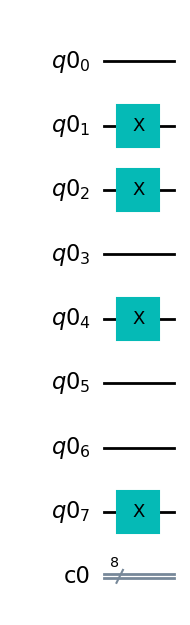

In [5]:
# Encode the key as qubits using the 'Alice quantum circuit'
# Apply X when the digit is equal to 1

for index, digit in enumerate(alice_key):
    if digit == '1':
        # Complete the code
        aliceqc.x(index)

# Plot the circuit
aliceqc.draw('mpl')

## Exercise 3: Measure every qubit in the key according to the following basis [X,Z,Z,Z,X,Z,X,X] where X stands for the diagonal basis and Z for the computational basis.

This corresponds to applying a H-gate to the qubit when measured in the diagonal basis.

Print the resulting circuit.

Next, propose a code generating a random measurement basis for every qubit.

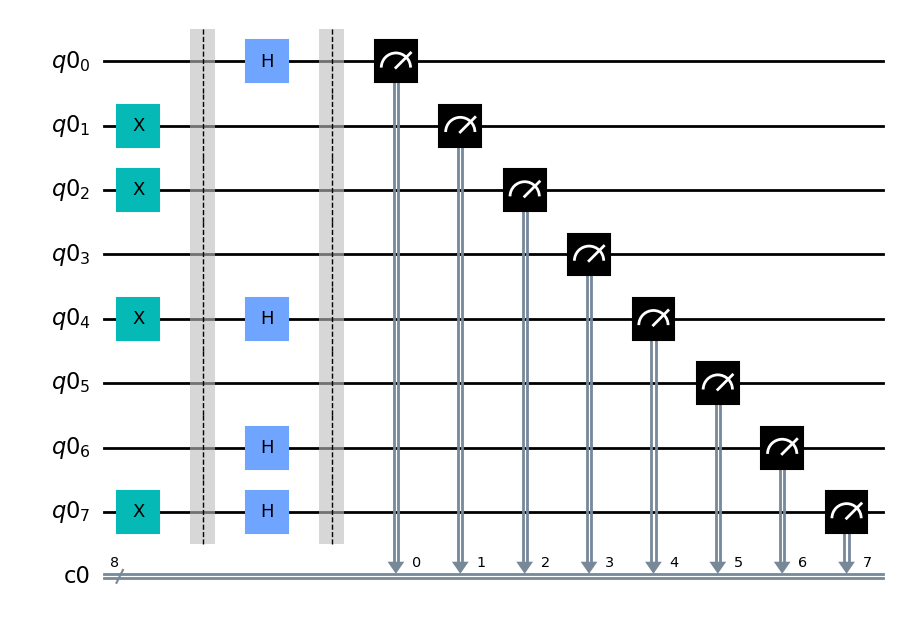

In [6]:
aliceqc.barrier(range(n))

alice_measurement_basis_table = ['X','Z','Z','Z','X','Z','X','X']

for index in range(n):
    if alice_measurement_basis_table[index] == 'X':
        # Complete the code
        aliceqc.h(index)

aliceqc.barrier(range(n))
aliceqc.measure(range(n), range(n))

# Plot the circuit
aliceqc.draw('mpl')

['X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X']


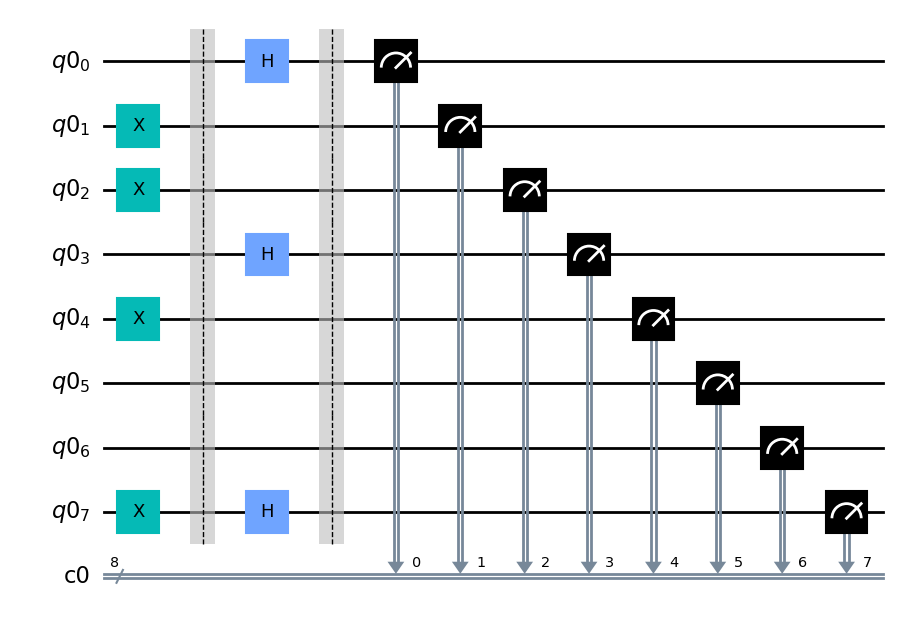

In [7]:
# Quantum circuit for alice state - random basis

aliceqc2 = QuantumCircuit(qr, cr)

for index, digit in enumerate(alice_key):
    # Complete the code
    if digit == '1':
        # Complete the code
        aliceqc2.x(index)

aliceqc2.barrier(range(n))

random_alice_measurement_basis_table = []   # Create empty basis table

for index in range(n):       
    if 0.5 < np.random.random():   
        # Complete the code      
        random_alice_measurement_basis_table.append('X')
    else:
        random_alice_measurement_basis_table.append('Z')
        
print(random_alice_measurement_basis_table)

for index in range(n):
    if random_alice_measurement_basis_table[index] == 'X':
        # Complete the code
        aliceqc2.h(index)

aliceqc2.barrier(range(n))

aliceqc2.measure(range(n), range(n))

# Plot the circuit
aliceqc2.draw('mpl')


## Exercise 4: Define "Bob's circuit" as a copy of Alice's circuit using the SendState funcion. 

Generate and apply random measurement basis to Bob's circuit as you did for Alice's.

Measure all qubits in Bob, run the simulation and plot the histogram.

Is alice_key within the results of the histogram?

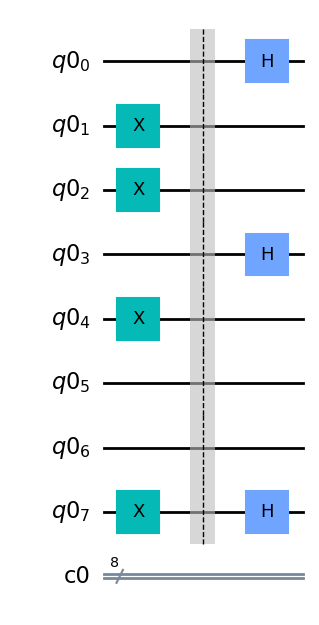

In [8]:
# Define bobqc and its initial state as a copy of Alice state

bobqc = QuantumCircuit(qr, cr)

SendState(aliceqc2, bobqc, 'Alice')

bobqc.draw('mpl')

['Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X']


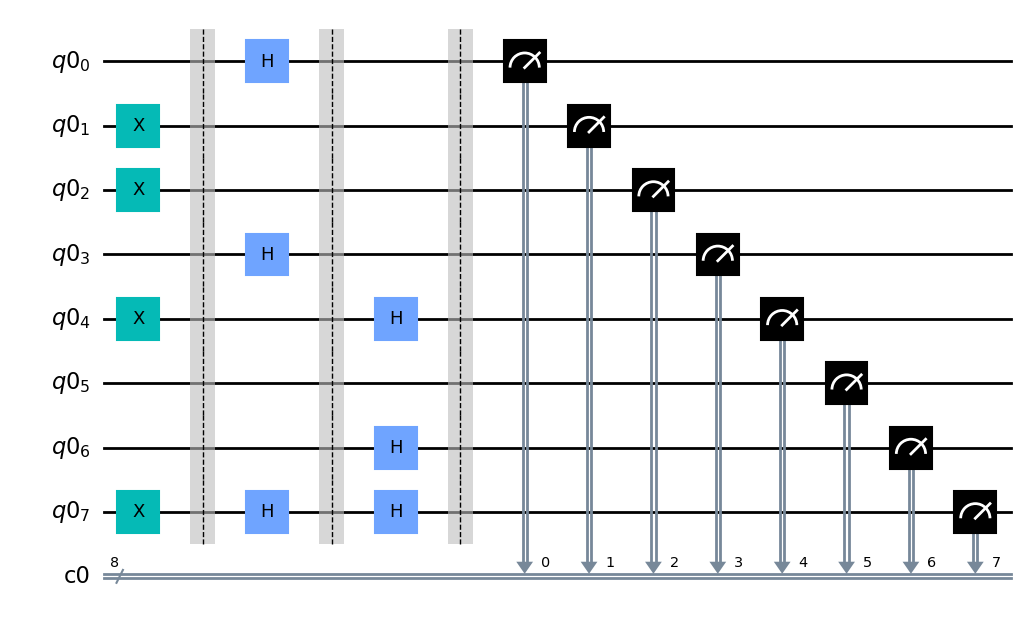

In [9]:
# Quantum circuit for bob state - random basis - complete the code

bobqc.barrier(range(n))

random_bob_measurement_basis_table = []   # Create empty basis table

for index in range(n):       
    if 0.5 < np.random.random():   
        # Complete the code      
        random_bob_measurement_basis_table.append('X')
    else:
        random_bob_measurement_basis_table.append('Z')
        
print(random_bob_measurement_basis_table)

for index in range(n):
    if random_bob_measurement_basis_table[index] == 'X':
        # Complete the code
        bobqc.h(index)

bobqc.barrier(range(n))

bobqc.measure(range(n), range(n))

# Plot the circuit
bobqc.draw('mpl')

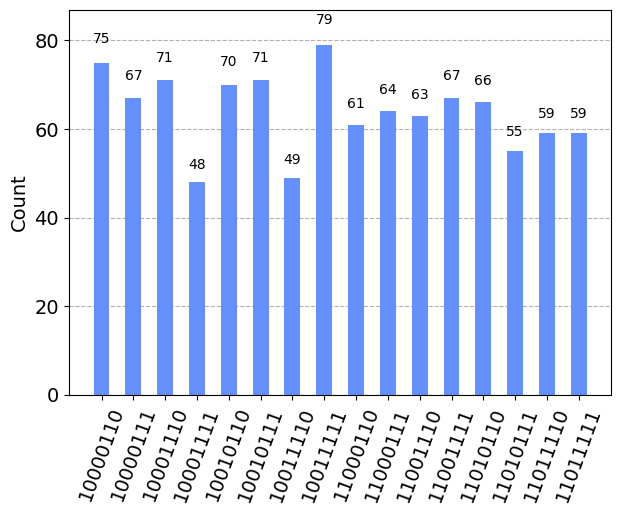

In [10]:
# Measure all qubits in Bob

sim = AerSimulator()

compiled_circuit = transpile(bobqc, sim)

job = sim.run(compiled_circuit)

result = job.result()

counts = result.get_counts()

plot_histogram(counts)

In [11]:
alice_key

'01101001'

### **Comments**: Yes, alice_key *is* within the results of the histogram.

## Exercise 5: Execute the proposed code.

Once Alice and Bob's keys have been exchanged and qubits measured with different basis discarded, are the remaining keys equal (percentage of similarity = 1)?

Does this result depends on the number of bits in the key?

How many bits needs your key to be able to send the key over long distances given the photon losses in optical fibers? 

In [12]:
# Key elements reversed so that first qubit is the first element of the list
bob_keys = [x[::-1] for x in counts.keys()]

# Bob key candidate
bob_key = bob_keys[0]

print(bob_key)
print(alice_key)


01110001
01101001


In [13]:
# Execute the following code and observe and comment the results

keep = []
discard = []

for qubit, basis in enumerate(zip(random_alice_measurement_basis_table, random_bob_measurement_basis_table)):
    if basis[0] == basis[1]:
        print("Same choice for qubit: {}, basis: {}\n" .format(qubit, basis[0]))
        keep.append(qubit)
    else:
        print("Different choice for qubit: {}, Alice has {}, Bob has {}\n" .format(qubit, basis[0], basis[1]))
        discard.append(qubit)


print("Mantained qubits {}".format(keep))
print("Discarded qubits {}".format(discard))

Different choice for qubit: 0, Alice has X, Bob has Z

Same choice for qubit: 1, basis: Z

Same choice for qubit: 2, basis: Z

Different choice for qubit: 3, Alice has X, Bob has Z

Different choice for qubit: 4, Alice has Z, Bob has X

Same choice for qubit: 5, basis: Z

Different choice for qubit: 6, Alice has Z, Bob has X

Same choice for qubit: 7, basis: X

Mantained qubits [1, 2, 5, 7]
Discarded qubits [0, 3, 4, 6]


In [14]:
acc = 0

for bit in zip(alice_key, bob_key):
    if bit[0] == bit[1]:
        acc += 1

print('Percentage of qubits to be discarded according to table comparison: ', len(discard)/n)
print('Measurement convergence by additional chance: ', acc/n)

Percentage of qubits to be discarded according to table comparison:  0.5
Measurement convergence by additional chance:  0.75


In [15]:
new_alice_key = [alice_key[qubit] for qubit in keep]
print(new_alice_key)

new_bob_key = [bob_key[qubit] for qubit in keep]
print(new_bob_key)

acc = 0
for bit in zip(new_alice_key, new_bob_key):
    if bit[0] == bit[1]:
        acc += 1
        
print('Percentage of similarity between the keys: ', acc/len(new_alice_key))

['1', '1', '0', '1']
['1', '1', '0', '1']
Percentage of similarity between the keys:  1.0


### **Comments**:

1. Once Alice and Bob share their key bitstrings and discard the ones in different bases, they will end up with the same key values such that the percentage of similarity = 1.

2. This clearly does not depend on the number of bits in the key, since all key bits in different bases are discarded, and those in the same bases are kept, regardless of the number of bits in the keys.

3. Since each key bit has a 50% probability to be different between Alice and Bob (and so will be discarded), the sifted key will be on average 50% in length of the original key bitstring. Additionally, given that photon loss in optical fibers is roughly 50% over 15 km (without using repeaters or amplifiers), the final sifted key bitstring will actually be even shorter, about 25% in lenghth of the original key initially sent by Alice. Therefore, depending on the desired length of the key bitstring that Alice wish to send to Bob to establish secure communication, Alice may need to send 4 times that amount to account for errors and photon loss.

## Exercise 6: Include a third circuit (Spy circuit), between Alice and Bob.

The spy circuit measures using its own random basis.

How can you detect that the key has been intercepted?

['X', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z']


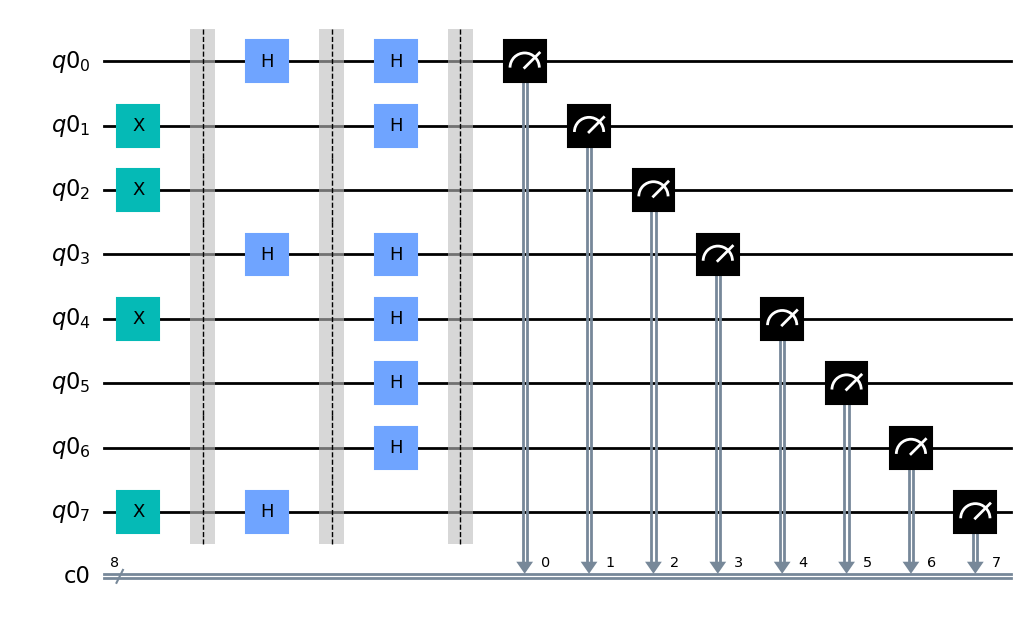

In [16]:
# Define the spy circuit (SendState to copy aliceqc2) and a random measurement basis

spyqc = QuantumCircuit(qr, cr)

SendState(aliceqc2, spyqc, 'Spy')

spyqc.barrier(range(n))

random_spy_measurement_basis_table = []

for index in range(n):
    if 0.5 < np.random.random():
        random_spy_measurement_basis_table.append('X')
    else:
        random_spy_measurement_basis_table.append('Z')

print(random_spy_measurement_basis_table)

for index in range(n):
    if random_spy_measurement_basis_table[index] == 'X':
        spyqc.h(index)

spyqc.barrier(range(n))

spyqc.measure(range(n), range(n))

spyqc.draw('mpl')

['X', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z']


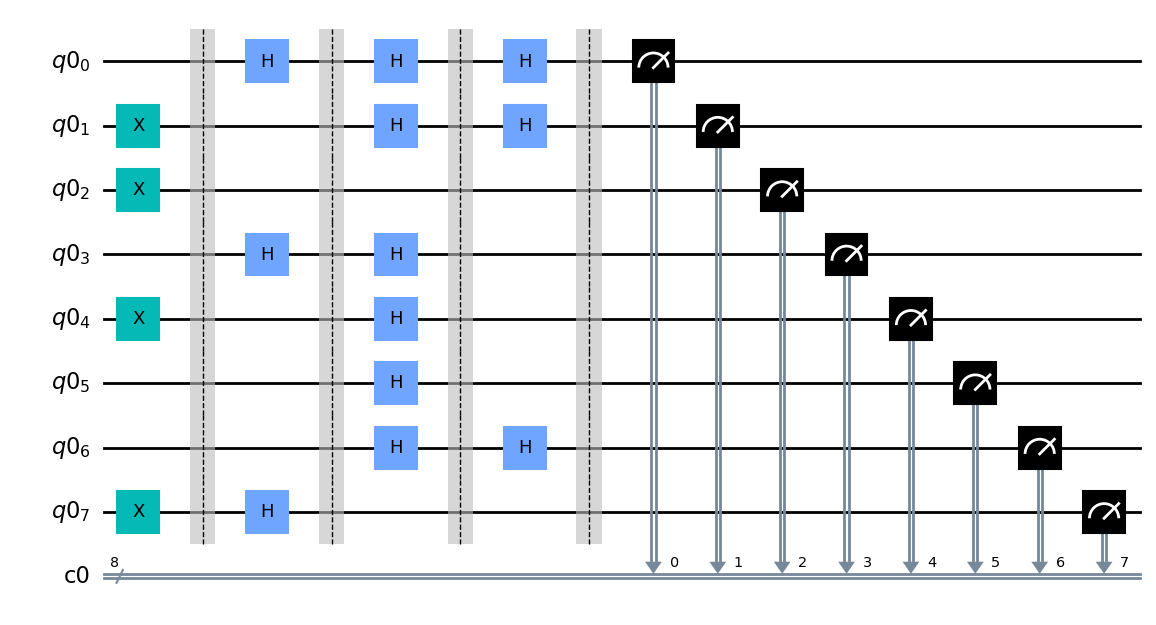

In [17]:
# Define bob's circuit and the random measurement basis

bobqc2 = QuantumCircuit(qr, cr)

SendState(spyqc, bobqc2, 'Bob 2')

bobqc2.barrier(range(n))

random_bob_2_measurement_basis_table = []

for index in range(n):
    if 0.5 < np.random.random():
        random_bob_2_measurement_basis_table.append('X')
    else:
        random_bob_2_measurement_basis_table.append('Z')

print(random_bob_2_measurement_basis_table)

for index in range(n):
    if random_bob_2_measurement_basis_table[index] == 'X':
        bobqc2.h(index)

bobqc2.barrier(range(n))

bobqc2.measure(range(n), range(n))

bobqc2.draw('mpl')

In [18]:
# Measure all qubits in Bob and run the simulation

# for index in range(n): 
#     bobqc2.measure(qr[index], cr[index])

sim = AerSimulator()

compiled_circuit = transpile(bobqc2, sim)

job = sim.run(compiled_circuit)

result = job.result()

counts = result.get_counts()

bob_keys = [x[::-1] for x in counts.keys()] 

bob_key = bob_keys[0]

keep = []
discard = []

for qubit, basis in enumerate(zip(random_alice_measurement_basis_table, random_bob_measurement_basis_table)):
    if basis[0] == basis[1]:
        print("Same choice for qubit: {}, basis: {}\n" .format(qubit, basis[0])) 
        keep.append(qubit)
    else:
        print("Different choice for qubit: {}, Alice has {}, Bob has {}\n" .format(qubit, basis[0], basis[1]))
        discard.append(qubit)
print("Mantained qubits {}".format(keep))
print("Discarded qubits {}".format(discard))

new_alice_key = [alice_key[qubit] for qubit in keep]
print(new_alice_key)

new_bob_key = [bob_key[qubit] for qubit in keep]
print(new_bob_key)

acc = 0
for bit in zip(new_alice_key, new_bob_key):
    if bit[0] == bit[1]:
        acc += 1
        
print('Percentage of similarity between the keys: ', acc/len(new_alice_key))


Different choice for qubit: 0, Alice has X, Bob has Z

Same choice for qubit: 1, basis: Z

Same choice for qubit: 2, basis: Z

Different choice for qubit: 3, Alice has X, Bob has Z

Different choice for qubit: 4, Alice has Z, Bob has X

Same choice for qubit: 5, basis: Z

Different choice for qubit: 6, Alice has Z, Bob has X

Same choice for qubit: 7, basis: X

Mantained qubits [1, 2, 5, 7]
Discarded qubits [0, 3, 4, 6]
['1', '1', '0', '1']
['1', '1', '1', '0']
Percentage of similarity between the keys:  0.5


### **Comments**:

- With a spy having intercepted the key sent by Alice, we see that the spy's random measurement bases change the state of the key bitstring that's then passed to and received by Bob.

- This means that after Alice and Bob compare their measurement bases and sift through the keys, there is a non-zero probability that they end up having different keys.

- This is unlike the situation before, where there was no spying, and there was 100% probability that Alice and Bob end up having the same keys (after comparing bases and key sifting).

- Therefore, if Alice and Bob discover that their sifted keys are different, they are able to conclude that a spy is intercepting the key bitstring, such that Alice and Bob are able to make changes to further strengthen the privacy and security of their communication channels.